In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
Data=pd.read_csv("BMW_Car_Sales_Classification.csv", encoding='latin-1')

In [3]:
Data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [5]:
DF=Data.isnull()
DF=Data.drop_duplicates()
DF=Data.fillna(0)

In [6]:
DF.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
DF.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [8]:
DF_sort= DF.sort_values(by='Year', ascending=True)
DataFrame = DF_sort.reset_index(drop=True)

In [9]:
DataFrame.drop(columns=['Color','Engine_Size_L'], inplace=True)
DataFrame.head()

,Model,Year,Region,Fuel_Type,Transmission,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,X3,2010,Asia,Diesel,Automatic,183771,114390,282,Low
1,X3,2010,Middle East,Hybrid,Manual,28776,88327,4330,Low
2,5 Series,2010,Europe,Petrol,Automatic,113518,70392,1929,Low
3,7 Series,2010,Africa,Diesel,Manual,108649,47035,356,Low
4,i3,2010,Africa,Diesel,Manual,33026,61498,5649,Low


In [10]:
DataFrame.value_counts(["Model","Sales_Classification","Year"])

Model     Sales_Classification  Year
5 Series  Low                   2016    253
X1        Low                   2019    247
7 Series  Low                   2021    237
i3        Low                   2015    235
                                2021    235
                                       ... 
M3        High                  2024     74
X6        High                  2012     74
M5        High                  2014     74
5 Series  High                  2021     71
X5        High                  2023     68
Name: count, Length: 330, dtype: int64

In [11]:
DataFrame.columns

Index(['Model', 'Year', 'Region', 'Fuel_Type', 'Transmission', 'Mileage_KM',
       'Price_USD', 'Sales_Volume', 'Sales_Classification'],
      dtype='object')

In [12]:
DataFrame

,Model,Year,Region,Fuel_Type,Transmission,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,X3,2010,Asia,Diesel,Automatic,183771,114390,282,Low
1,X3,2010,Middle East,Hybrid,Manual,28776,88327,4330,Low
2,5 Series,2010,Europe,Petrol,Automatic,113518,70392,1929,Low
3,7 Series,2010,Africa,Diesel,Manual,108649,47035,356,Low
4,i3,2010,Africa,Diesel,Manual,33026,61498,5649,Low
...,...,...,...,...,...,...,...,...,...
49995,3 Series,2024,Asia,Electric,Manual,102284,84965,9485,High
49996,i3,2024,Asia,Hybrid,Automatic,15037,107290,3689,Low
49997,M5,2024,Europe,Diesel,Manual,145008,52079,2621,Low
49998,X6,2024,Africa,Hybrid,Automatic,127612,72760,4381,Low


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
X=DataFrame.drop(columns=['Sales_Classification'])
y = le.fit_transform(DataFrame['Sales_Classification'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=100)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9068\3708084480.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DataFrame, x='Sales_Classification', palette='pastel')


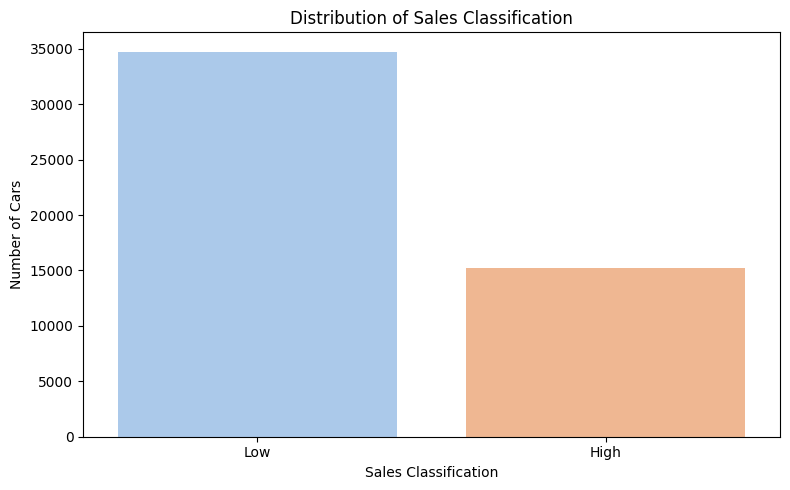

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=DataFrame, x='Sales_Classification', palette='pastel')
plt.title("Distribution of Sales Classification")
plt.xlabel("Sales Classification")
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()


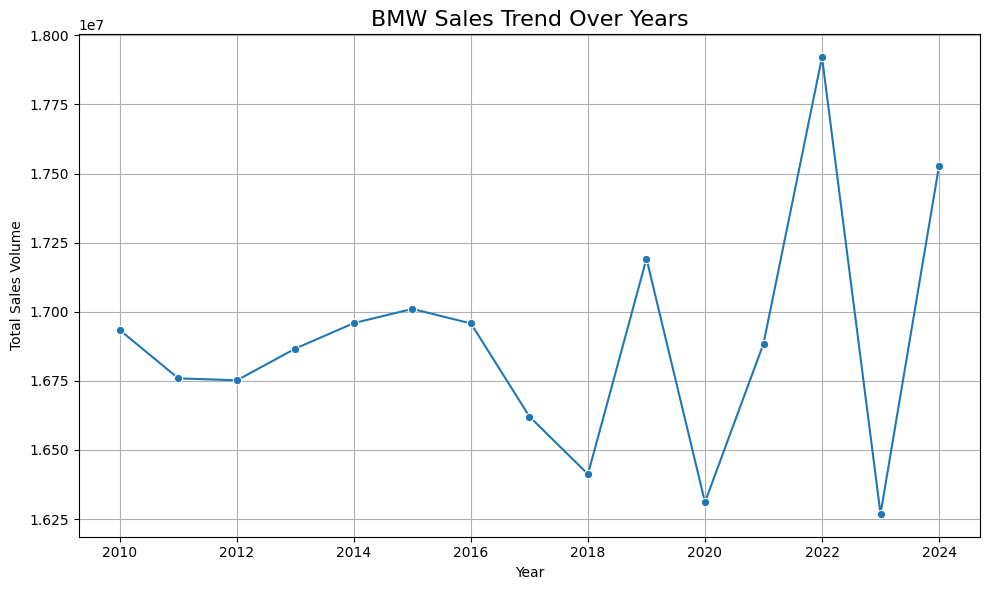

In [16]:
sales_trend = DataFrame.groupby("Year")["Sales_Volume"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=sales_trend, x="Year", y="Sales_Volume", marker="o")
plt.title("BMW Sales Trend Over Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9068\1788523317.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


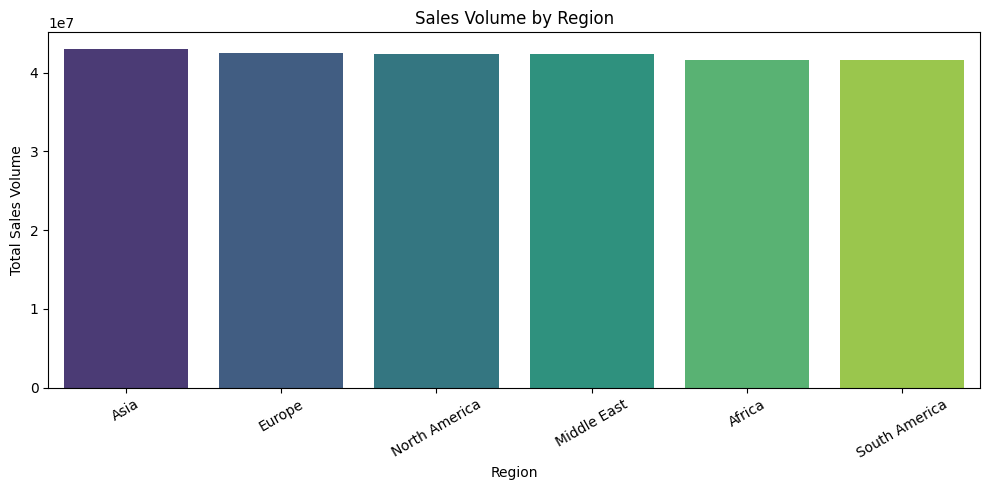

In [17]:
region_sales = DataFrame.groupby("Region")["Sales_Volume"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Sales Volume by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9068\3151063603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")


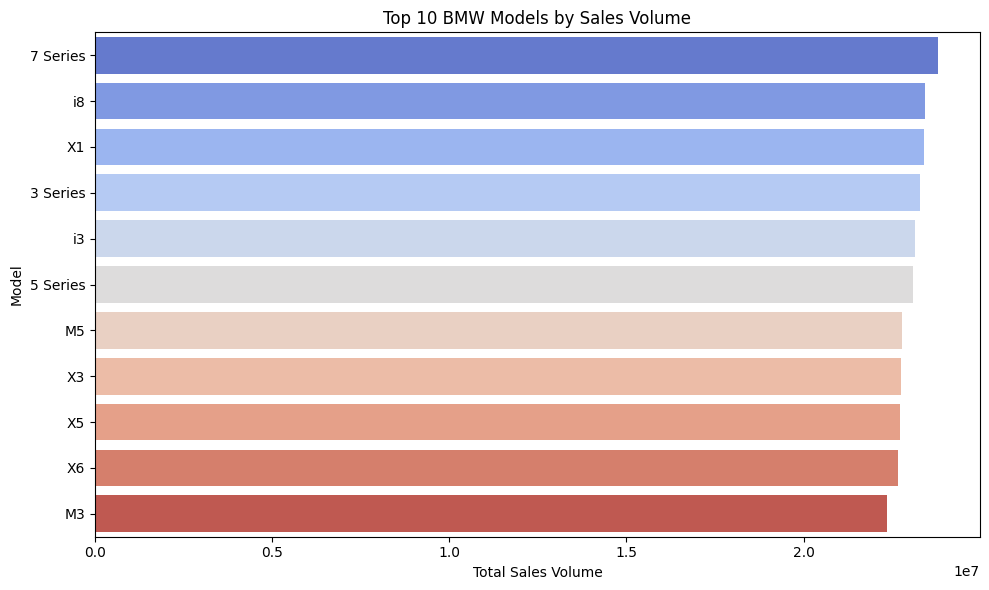

In [18]:
top_models = DataFrame.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")
plt.title("Top 10 BMW Models by Sales Volume")
plt.xlabel("Total Sales Volume")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


In [19]:
DataFrame.head(10)

,Model,Year,Region,Fuel_Type,Transmission,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,X3,2010,Asia,Diesel,Automatic,183771,114390,282,Low
1,X3,2010,Middle East,Hybrid,Manual,28776,88327,4330,Low
2,5 Series,2010,Europe,Petrol,Automatic,113518,70392,1929,Low
3,7 Series,2010,Africa,Diesel,Manual,108649,47035,356,Low
4,i3,2010,Africa,Diesel,Manual,33026,61498,5649,Low
5,X6,2010,South America,Diesel,Manual,69196,117224,6439,Low
6,X5,2010,Europe,Petrol,Automatic,77381,34557,5481,Low
7,i8,2010,North America,Diesel,Manual,140639,45666,8466,High
8,X1,2010,Europe,Electric,Manual,5141,94980,3611,Low
9,X6,2010,Africa,Electric,Automatic,94800,85456,4133,Low


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_9068\1237770081.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Fuel_type.values, y=Fuel_type.index, palette="coolwarm")


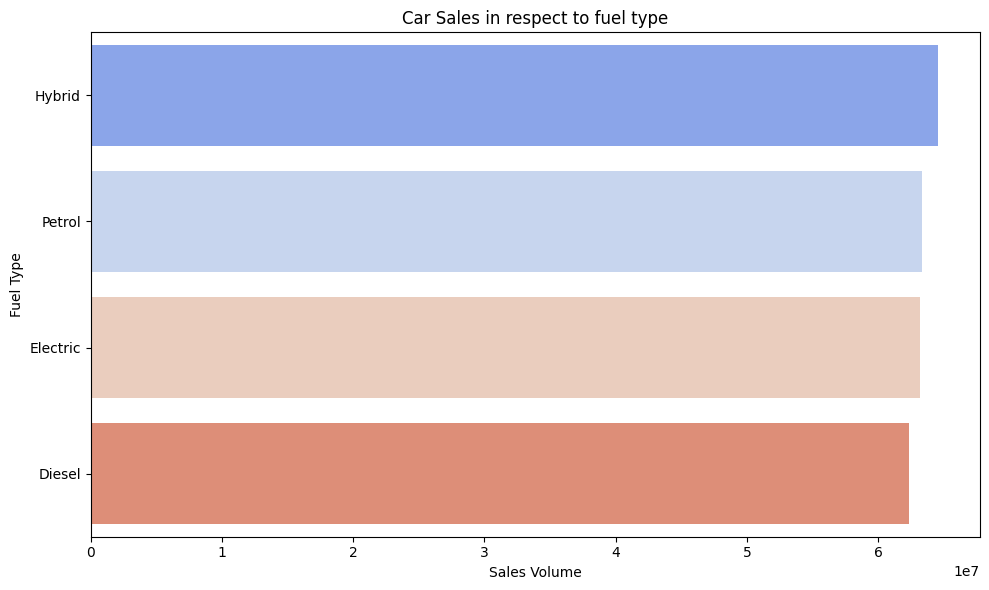

In [20]:
Fuel_type=DataFrame.groupby("Fuel_Type")["Sales_Volume"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=Fuel_type.values, y=Fuel_type.index, palette="coolwarm")
plt.xlabel("Sales Volume")
plt.ylabel("Fuel Type")
plt.title("Car Sales in respect to fuel type")
plt.tight_layout()
plt.show()

In [21]:
DataFrame.head()

,Model,Year,Region,Fuel_Type,Transmission,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,X3,2010,Asia,Diesel,Automatic,183771,114390,282,Low
1,X3,2010,Middle East,Hybrid,Manual,28776,88327,4330,Low
2,5 Series,2010,Europe,Petrol,Automatic,113518,70392,1929,Low
3,7 Series,2010,Africa,Diesel,Manual,108649,47035,356,Low
4,i3,2010,Africa,Diesel,Manual,33026,61498,5649,Low


In [22]:
DataFrame['Transmission'] = le.fit_transform(DataFrame['Transmission'])
DataFrame['Sales_Classification'] = le.fit_transform(DataFrame['Sales_Classification'])

In [23]:
from sklearn.model_selection import train_test_split

X = DataFrame.drop(columns=['Sales_Classification'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y)

from imblearn.combine import SMOTEENN


X_train_encoded = pd.get_dummies(X_train, columns=['Model', 'Region', 'Fuel_Type', 'Transmission'])
X_test_encoded = pd.get_dummies(X_test, columns=['Model', 'Region', 'Fuel_Type', 'Transmission'])

missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for c in missing_cols:
    X_test_encoded[c] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X_train_encoded, y_train)


print("\nResampled class distribution:\n", pd.Series(y_res).value_counts())


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_res, y_res)


y_pred = model.predict(X_test_encoded)


print("\nClassification Report:\n", classification_report(y_test, y_pred))


Resampled class distribution:
 0    26454
1    25151
Name: count, dtype: int64

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3049
           1       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



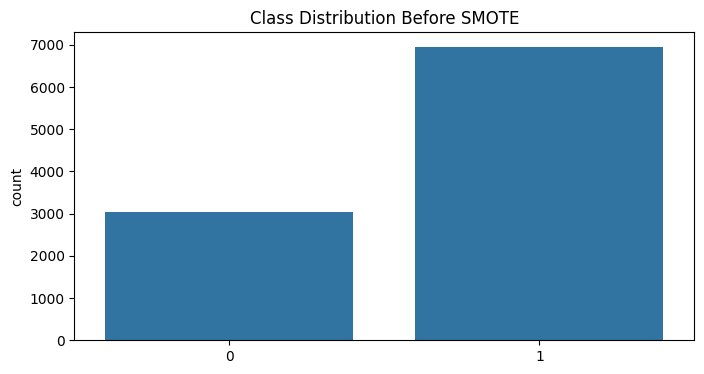

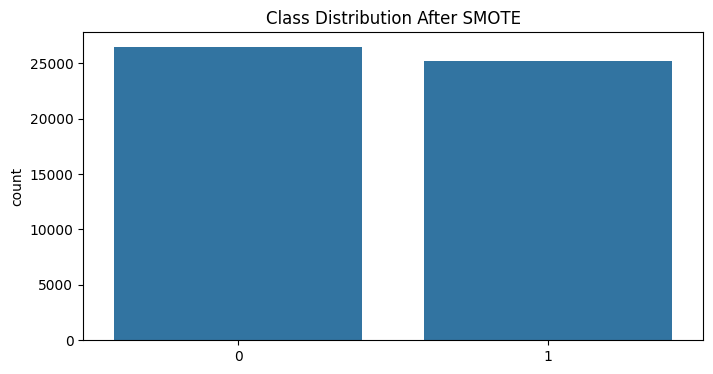

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_test)
plt.title('Class Distribution Before SMOTE')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x=y_res)
plt.title('Class Distribution After SMOTE')
plt.show()

In [25]:
from sklearn.metrics import classification_report,accuracy_score
CLR=classification_report(y_test, y_pred)
print(CLR)
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3049
           1       1.00      1.00      1.00      6951

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Accuracy: 0.9995


In [26]:
from joblib import dump, load
import pandas as pd

dump({
    'model': model,
    'encoder': le,
    'feature_columns': X_train_encoded.columns.tolist() 
}, 'bmw_sales_model_package.joblib')

def predict_sales(new_data):

    try:
       
        artifacts = load('bmw_sales_model_package.joblib')
        model = artifacts['model']
        le = artifacts['encoder']
        feature_columns = artifacts['feature_columns']
        
        
        input_data = new_data.copy()
        
       
        if 'Sales_Volume' in input_data.columns:
            input_data['Sales_Volume'] = pd.to_numeric(input_data['Sales_Volume'], errors='coerce').fillna(0)
        
        
        if 'Transmission' not in input_data.columns and 'Transmission' in input_data.columns:
            input_data['Transmission'] = input_data.pop('Transmission')
        
        
        input_encoded = pd.get_dummies(input_data)
        
        
        for col in feature_columns:
            if col not in input_encoded.columns:
                input_encoded[col] = 0
        
 
        input_encoded = input_encoded[feature_columns]
        
        pred = model.predict(input_encoded)
        return le.inverse_transform(pred)[0]
    
    except Exception as e:
        print(f"Prediction failed: {str(e)}")
        return None

test_example = pd.DataFrame({
    'Year': [2024],
    'Model': ['M3'], 
    'Region': ['South America'],
    'Fuel_Type': ['Electric'],
    'Transmission': ['Automatic'],  
    'Sales_Volume': [9638] 
})

print("Test Prediction:", predict_sales(test_example))

Test Prediction: High


In [27]:
DataFrame.head(10)

,Model,Year,Region,Fuel_Type,Transmission,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,X3,2010,Asia,Diesel,0,183771,114390,282,1
1,X3,2010,Middle East,Hybrid,1,28776,88327,4330,1
2,5 Series,2010,Europe,Petrol,0,113518,70392,1929,1
3,7 Series,2010,Africa,Diesel,1,108649,47035,356,1
4,i3,2010,Africa,Diesel,1,33026,61498,5649,1
5,X6,2010,South America,Diesel,1,69196,117224,6439,1
6,X5,2010,Europe,Petrol,0,77381,34557,5481,1
7,i8,2010,North America,Diesel,1,140639,45666,8466,0
8,X1,2010,Europe,Electric,1,5141,94980,3611,1
9,X6,2010,Africa,Electric,0,94800,85456,4133,1
